In [59]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [60]:
df = pd.read_csv('RPGF3Results.csv')

In [61]:
filtered_data = df[df['Category: Developer Ecosystem'] != 0]
df = filtered_data.copy()

In [62]:
selected_columns = df.filter(like='OSO').merge(df[['Result: Received OP']], left_index=True, right_index=True)


In [63]:
df = selected_columns.copy()

In [64]:
df

,OSO: # GitHub Repos,OSO: Date First Commit,OSO: Total Stars,OSO: Total Forks,OSO: Total Contributors,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,OSO: # OP Contracts,OSO: Date First Txn,OSO: Total Onchain Users,OSO: Onchain Users Last 6 Months,OSO: Total Txns,OSO: Total Txn Fees (ETH),OSO: Txn Fees Last 6 Months (ETH),OSO: # NPM Packages,OSO: Date First Download,OSO: Total Downloads,OSO: Downloads Last 6 Months,OSO: Has Profile,Result: Received OP
0,275.0,2013-12-19,43809.0,18669.0,16072.0,1356.0,45.833333,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,663853.62
1,1.0,2013-12-26,43809.0,18669.0,4961.0,354.0,1.500000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,496896.42
2,1.0,2014-01-03,21055.0,5504.0,1834.0,108.0,2.666667,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,422361.96
3,14.0,2013-03-26,2609.0,814.0,978.0,181.0,5.333333,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,339545.72
4,29.0,2016-05-03,7095.0,1714.0,1799.0,161.0,1.166667,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,2017-04-05,115250426.0,27880694.0,1,298137.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2.0,2023-10-12,NaN,NaN,1.0,1.0,0.166667,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1,0.00
634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00
637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 640
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OSO: # GitHub Repos                         195 non-null    float64
 1   OSO: Date First Commit                      195 non-null    object 
 2   OSO: Total Stars                            114 non-null    float64
 3   OSO: Total Forks                            105 non-null    float64
 4   OSO: Total Contributors                     195 non-null    float64
 5   OSO: Contributors Last 6 Months             195 non-null    float64
 6   OSO: Avg Monthly Active Devs Last 6 Months  192 non-null    float64
 7   OSO: # OP Contracts                         195 non-null    float64
 8   OSO: Date First Txn                         46 non-null     object 
 9   OSO: Total Onchain Users                    195 non-null    float64
 10  OSO: Onchain Users 

In [66]:
df = df.fillna(0)

In [67]:
col_drop = ['OSO: Date First Commit', 'OSO: Date First Txn', 'OSO: Date First Download']
df.drop(col_drop,axis= 1, inplace=True)
df

,OSO: # GitHub Repos,OSO: Total Stars,OSO: Total Forks,OSO: Total Contributors,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,OSO: # OP Contracts,OSO: Total Onchain Users,OSO: Onchain Users Last 6 Months,OSO: Total Txns,OSO: Total Txn Fees (ETH),OSO: Txn Fees Last 6 Months (ETH),OSO: # NPM Packages,OSO: Total Downloads,OSO: Downloads Last 6 Months,OSO: Has Profile,Result: Received OP
0,275.0,43809.0,18669.0,16072.0,1356.0,45.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,663853.62
1,1.0,43809.0,18669.0,4961.0,354.0,1.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,496896.42
2,1.0,21055.0,5504.0,1834.0,108.0,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,422361.96
3,14.0,2609.0,814.0,978.0,181.0,5.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,339545.72
4,29.0,7095.0,1714.0,1799.0,161.0,1.166667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,115250426.0,27880694.0,1,298137.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2.0,0.0,0.0,1.0,1.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.00
634,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
637,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
639,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00


In [68]:
corelate = df.corr()['Result: Received OP'] 
print(corelate)
spearman_cor = df.corr(method='spearman')['Result: Received OP'] # non-linear correlation
print(spearman_cor)

OSO: # GitHub Repos                           0.382410
OSO: Total Stars                              0.713994
OSO: Total Forks                              0.689244
OSO: Total Contributors                       0.682172
OSO: Contributors Last 6 Months               0.680436
OSO: Avg Monthly Active Devs Last 6 Months    0.596408
OSO: # OP Contracts                           0.050397
OSO: Total Onchain Users                      0.036890
OSO: Onchain Users Last 6 Months              0.053918
OSO: Total Txns                               0.045772
OSO: Total Txn Fees (ETH)                     0.115042
OSO: Txn Fees Last 6 Months (ETH)             0.117191
OSO: # NPM Packages                           0.222921
OSO: Total Downloads                          0.300415
OSO: Downloads Last 6 Months                  0.310414
OSO: Has Profile                              0.382879
Result: Received OP                           1.000000
Name: Result: Received OP, dtype: float64
OSO: # GitHub Repos    

In [69]:
columns_to_drop = []
for i in range(len(df.columns)):
    
    if -0.05 < corelate[i] < 0.05 or -0.05 < spearman_cor[i] < 0.05:
        print(df.columns[i], " ", corelate[i], " ", spearman_cor[i])
        columns_to_drop.append(df.columns[i])
df = df.drop(columns=columns_to_drop, axis=1)


OSO: Total Onchain Users   0.036890407532611504   0.21080126476291033
OSO: Total Txns   0.04577209248461864   0.21224613911075016


In [70]:
columns_with_nan = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: []


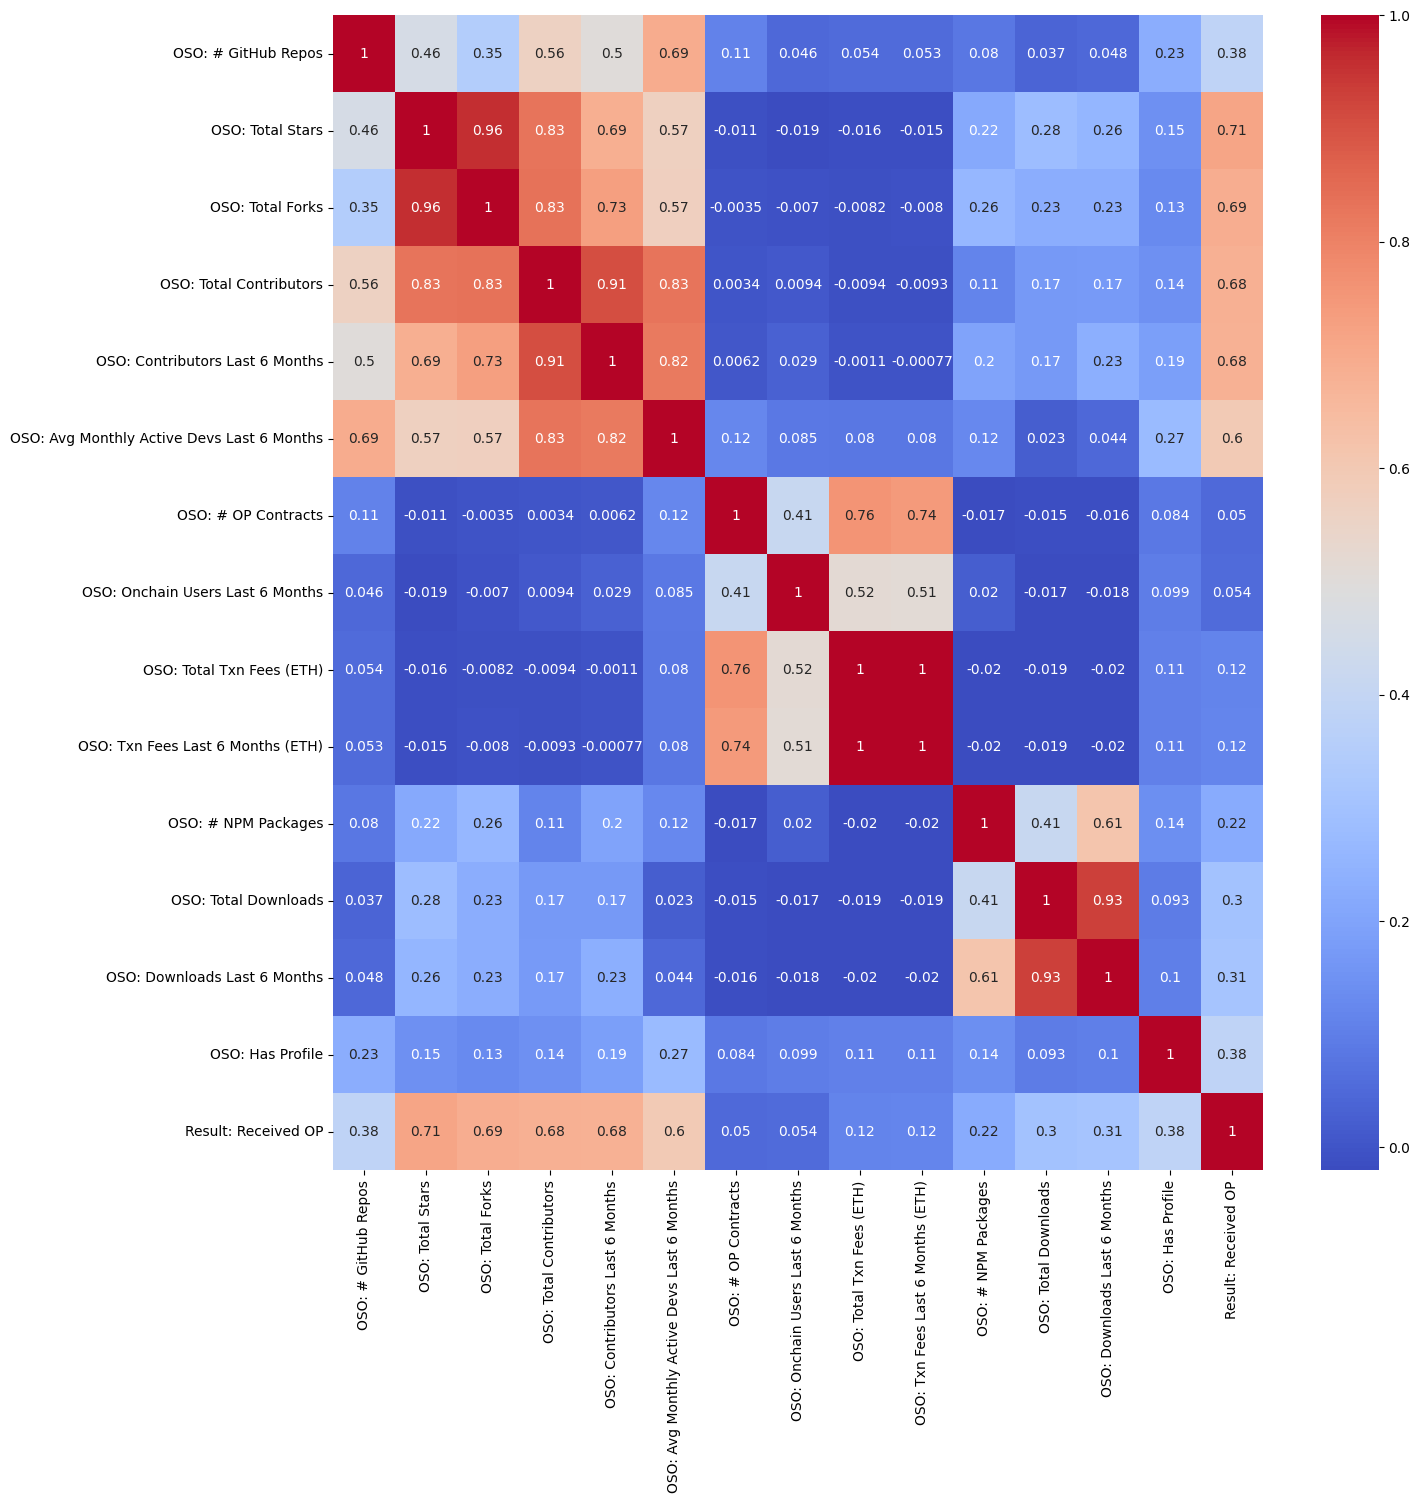

In [71]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

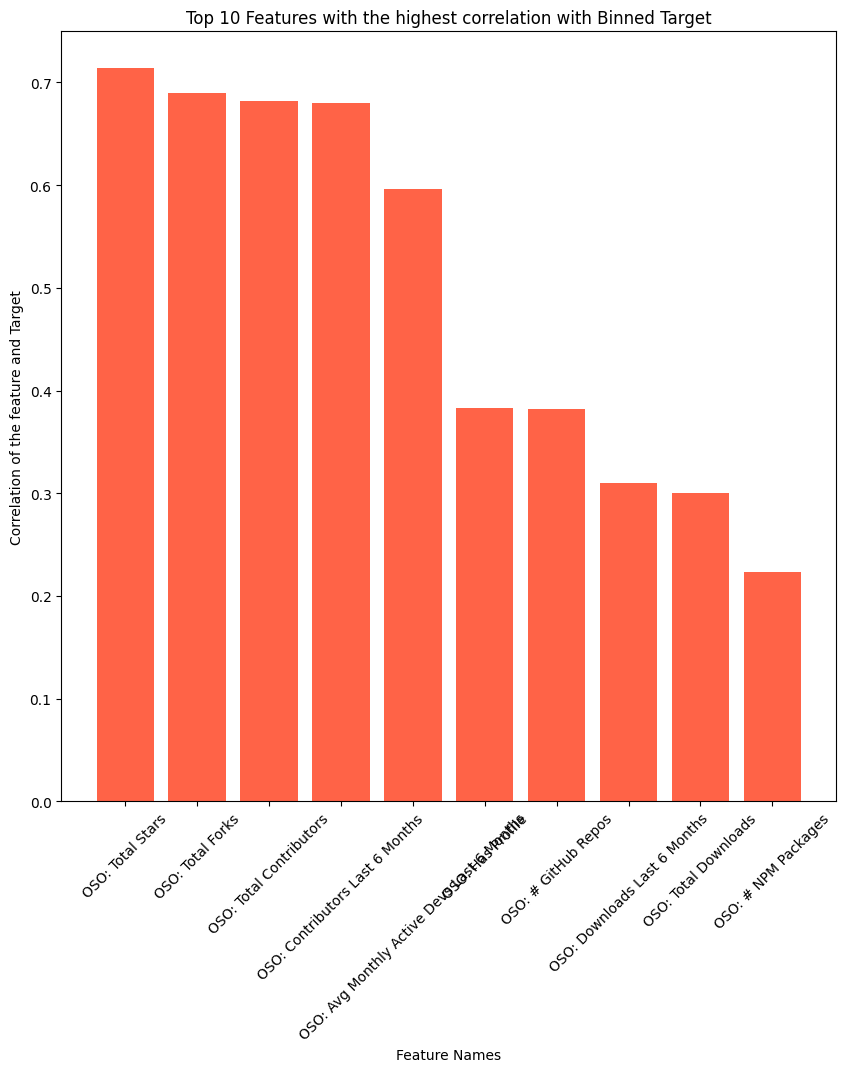

In [72]:
correlations = df.corr()['Result: Received OP'].drop('Result: Received OP')
feature = correlations.abs().nlargest(10).index
count = correlations.abs().nlargest(10).values

plt.figure(figsize=(10,10))
plt.bar(x=feature, height=count,color = 'tomato')
plt.xlabel('Feature Names')
plt.ylabel('Correlation of the feature and Target')
plt.title('Top 10 Features with the highest correlation with Binned Target')
plt.xticks(rotation = 45)
plt.show()

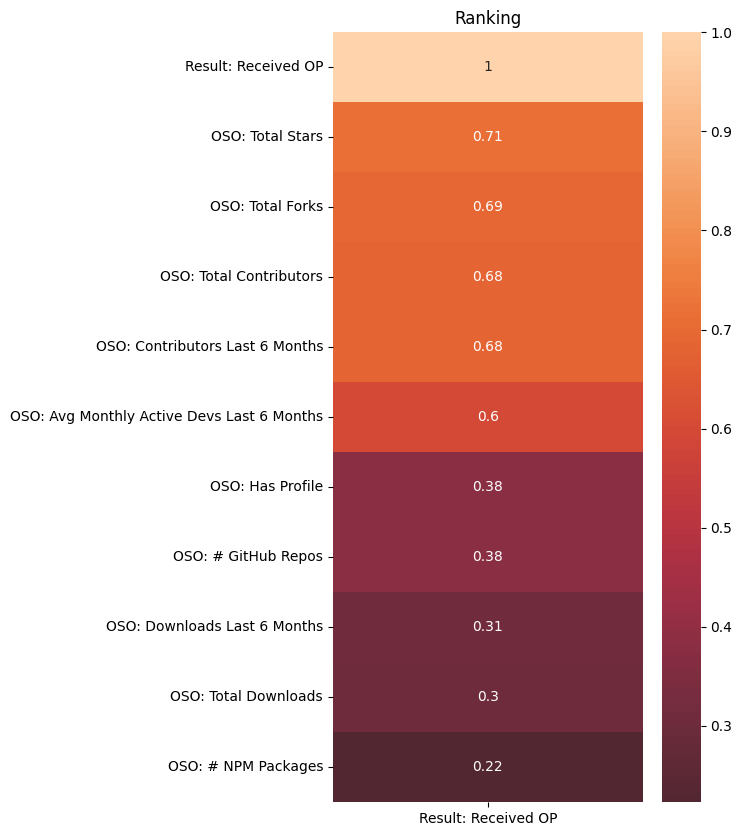

In [73]:
top_10_df = df[feature.to_list() + ['Result: Received OP']].copy()

top_10_corr = top_10_df.corr()[['Result: Received OP']]

sorted_corr = top_10_corr.sort_values(by = 'Result: Received OP', key=lambda x : abs(x), ascending=False)

plt.figure(figsize=(5,10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Ranking')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

X = df.drop('Result: Received OP', axis=1)
y = df['Result: Received OP']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [75]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [80]:
cv_results_rms = []
print("Score of Each Model")
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Score of Each Model
LinearRegression: -54752.379011 
DecisionTree: -59391.959123 
RandomForest: -50012.690168 
KNeighbors: -54155.392201 
XGBRegressor: -57816.571949 


In [77]:
pred = pipeline_rf.predict(X_test)

In [79]:
print("More Evalution Tools")
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

More Evalution Tools
R^2: 0.4030051742882501
Adjusted R^2: 0.2681998910630162
MAE: 33210.6269062604
MSE: 2519043592.3947883
RMSE: 50190.07464025918


## Random Forest is the best model (for now)